In [124]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Clase/Neuralnetwork/housepricedata.csv')
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [125]:
dataset = df.values

In [126]:
dataset # Escalado de información

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [127]:
X = dataset[:,0:10]

In [128]:
y = dataset[:,10]

In [129]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [130]:
#all values between 0 and 1

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [131]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [132]:
from sklearn.model_selection import train_test_split
#Train and test set (30%)
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_scale, y, test_size=0.3)
#validation test (50% of test set)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


Setting up the architecture

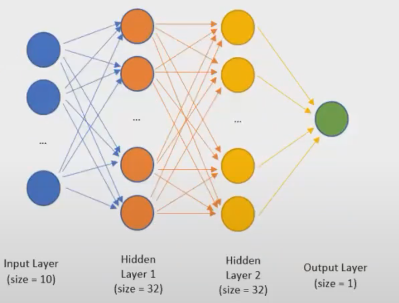



Hidden layer 1: 32 neurons, ReLU Activation

Hidden layer 2: 32 neurons, ReLU Actination

Output Layer : 1 neuron , Sigmoid Activation


In [133]:
from keras.models import Sequential
from keras.layers import Dense

In [134]:
# sequentially (layer by layer)
# 'dense' refers to a fully-connected layer

model = Sequential([
    Dense(32, activation = 'relu',input_shape=(10,)),  #10 input layer
    Dense(32, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [135]:
# 'sgd' refers to stochastic gradient descent
# the loss function for outputs that take the values 1 or 0 is called binary cross entropy
# we want to track accuracy on top of the loss function

model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'] 
)

In [136]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                352       
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


In [137]:
hist = model.fit(
    X_train, y_train,
    batch_size = 32,
    epochs = 120,
    validation_data = (X_val, y_val)
)

Epoch 1/120
32/32 [==============================] - 1s 8ms/step - loss: 0.6839 - accuracy: 0.5313 - val_loss: 0.6827 - val_accuracy: 0.5434
Epoch 2/120
32/32 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.6673 - val_loss: 0.6774 - val_accuracy: 0.6849
Epoch 3/120
32/32 [==============================] - 0s 3ms/step - loss: 0.6737 - accuracy: 0.7319 - val_loss: 0.6722 - val_accuracy: 0.7626
Epoch 4/120
32/32 [==============================] - 0s 3ms/step - loss: 0.6686 - accuracy: 0.7847 - val_loss: 0.6671 - val_accuracy: 0.7900
Epoch 5/120
32/32 [==============================] - 0s 3ms/step - loss: 0.6635 - accuracy: 0.7955 - val_loss: 0.6620 - val_accuracy: 0.7945
Epoch 6/120
32/32 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.8033 - val_loss: 0.6570 - val_accuracy: 0.8128
Epoch 7/120
32/32 [==============================] - 0s 4ms/step - loss: 0.6537 - accuracy: 0.8092 - val_loss: 0.6521 - val_accuracy: 0.8128
Epoch 8/120
3

In [138]:
model.evaluate(X_test , y_test)[1]

7/7 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.8904


0.8904109597206116

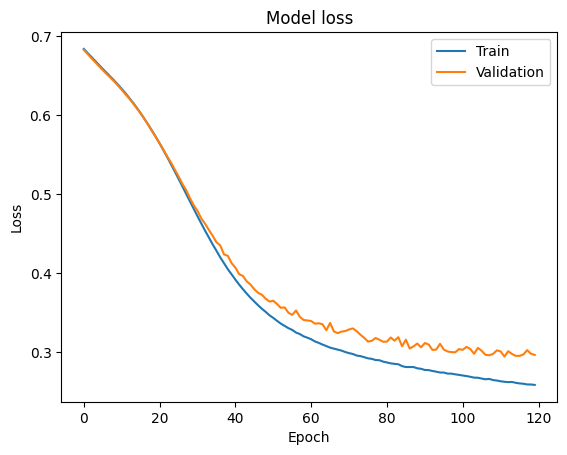

In [139]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

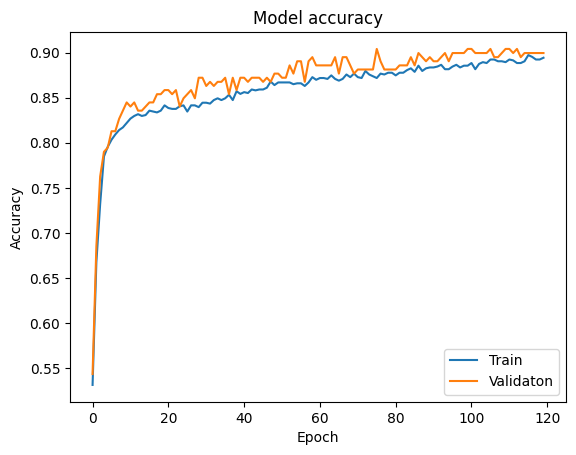

In [140]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validaton'], loc ='lower right')
plt.show()

In [141]:
model_2 = Sequential([
    Dense(1000, activation = 'relu',input_shape=(10,)),  #10 input layer
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1000, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [142]:
model_2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'] 
)

In [143]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1000)              11000     
                                                                 
 dense_26 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_27 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_28 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_29 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 3,015,001
Trainable params: 3,015,001
Non-trainable params: 0
_________________________________________________________________


In [144]:
hist_2 = model_2.fit(
    X_train, y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (X_val, y_val)
)

Epoch 1/100
32/32 [==============================] - 3s 60ms/step - loss: 0.4580 - accuracy: 0.7515 - val_loss: 0.5078 - val_accuracy: 0.8174
Epoch 2/100
32/32 [==============================] - 2s 54ms/step - loss: 0.3198 - accuracy: 0.8699 - val_loss: 0.3448 - val_accuracy: 0.8447
Epoch 3/100
32/32 [==============================] - 2s 53ms/step - loss: 0.3204 - accuracy: 0.8659 - val_loss: 0.4438 - val_accuracy: 0.8356
Epoch 4/100
32/32 [==============================] - 2s 53ms/step - loss: 0.2935 - accuracy: 0.8767 - val_loss: 0.3571 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 2s 52ms/step - loss: 0.2818 - accuracy: 0.8875 - val_loss: 0.3341 - val_accuracy: 0.8676
Epoch 6/100
32/32 [==============================] - 2s 65ms/step - loss: 0.2424 - accuracy: 0.9022 - val_loss: 0.3458 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 3s 88ms/step - loss: 0.2544 - accuracy: 0.8963 - val_loss: 0.3716 - val_accuracy: 0.8767
Epoch 

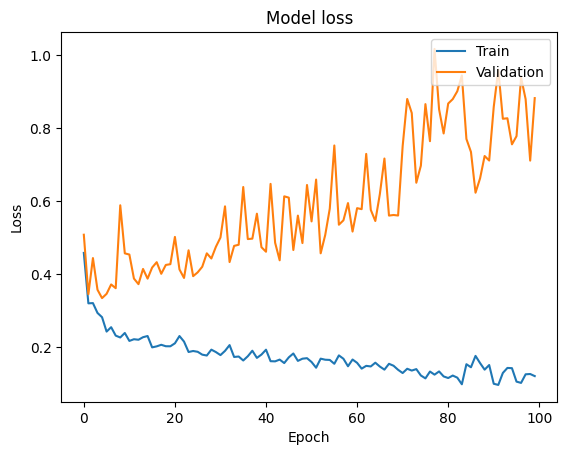

In [145]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

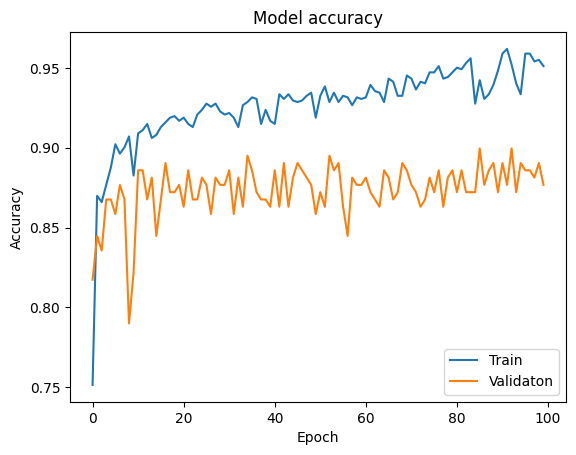

In [146]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validaton'], loc ='lower right')
plt.show()

In [147]:
from keras.layers import Dropout
from keras import regularizers

In [148]:
model_3 = Sequential([
    Dense(1000, activation = 'relu', kernel_regularizer = regularizers.l2(0.01) , input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation = 'relu',kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.01)),
])

In [149]:
model_3.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy'] 
)

In [150]:
model_3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1000)              11000     
                                                                 
 dropout_4 (Dropout)         (None, 1000)              0         
                                                                 
 dense_31 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_5 (Dropout)         (None, 1000)              0         
                                                                 
 dense_32 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_6 (Dropout)         (None, 1000)              0         
                                                                 
 dense_33 (Dense)            (None, 1000)             

In [151]:
hist_3 = model_3.fit(
    X_train, y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (X_val, y_val)
)

Epoch 1/100
32/32 [==============================] - 4s 68ms/step - loss: 14.2649 - accuracy: 0.6233 - val_loss: 3.9320 - val_accuracy: 0.7900
Epoch 2/100
32/32 [==============================] - 2s 62ms/step - loss: 1.7029 - accuracy: 0.8239 - val_loss: 0.6931 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 63ms/step - loss: 0.5952 - accuracy: 0.8434 - val_loss: 0.5911 - val_accuracy: 0.8265
Epoch 4/100
32/32 [==============================] - 2s 59ms/step - loss: 0.4889 - accuracy: 0.8659 - val_loss: 0.5357 - val_accuracy: 0.8721
Epoch 5/100
32/32 [==============================] - 3s 93ms/step - loss: 0.4740 - accuracy: 0.8816 - val_loss: 0.5215 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 3s 81ms/step - loss: 0.4738 - accuracy: 0.8757 - val_loss: 0.5216 - val_accuracy: 0.8721
Epoch 7/100
32/32 [==============================] - 2s 60ms/step - loss: 0.4679 - accuracy: 0.8699 - val_loss: 0.4658 - val_accuracy: 0.8858
Epoch

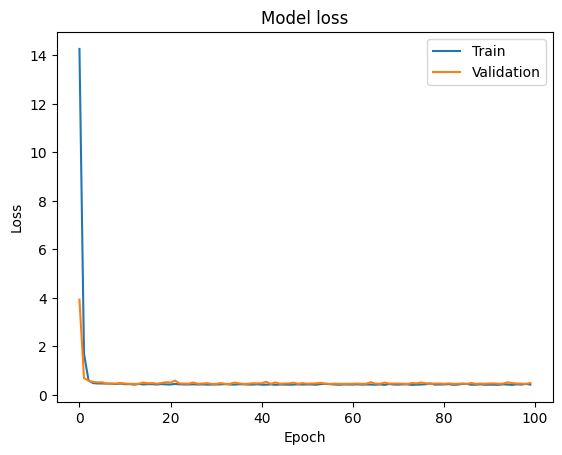

In [152]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

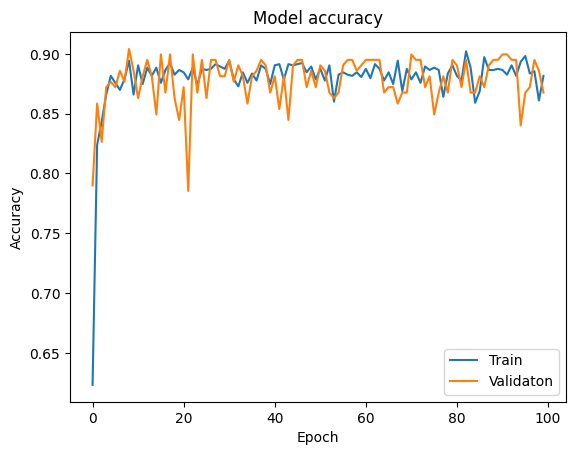

In [153]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validaton'], loc ='lower right')
plt.show()

In [154]:
import numpy as np


In [155]:
threshold = 0.5
predictions = model.predict(X_test)
predictions_2 = model_2.predict(X_test)
predictions_3 = model_3.predict(X_test)

binary_predictions = (predictions >= threshold).astype(int)
binary_predictions_2 = (predictions_2 >= threshold).astype(int)
binary_predictions_3 = (predictions_3 >= threshold).astype(int)

# Combina los resultados de los tres modelos en una sola lista de tuplas
results = list(zip(binary_predictions, binary_predictions_2, binary_predictions_3))

# Itera sobre la lista de tuplas y muestra los resultados para cada modelo
for idx, (pred_1, pred_2, pred_3) in enumerate(results):
    print(f"Model 1: {pred_1[0]}.  Model 2: {pred_2[0]}.  Model 3: {pred_3[0]}.  Real Species was {y_test[idx]}")




7/7 [==============================] - 0s 10ms/step
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 0.  Model 2: 0.  Model 3: 0.  Real Species was 0
Model 1: 0.  Model 2: 0.  Model 3: 0.  Real Species was 0
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 0.  Model 2: 0.  Model 3: 0.  Real Species was 0
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 1
Model 1: 0.  Model 2: 0.  Model 3: 0.  Real Species was 0
Model 1: 1.  Model 2: 1.  Model 3: 1.  Real Species was 0
Model 1: 0.  Model 2: 0.  Model 3: 0.  Real Species was 1
Model 1: 0.  Model 2